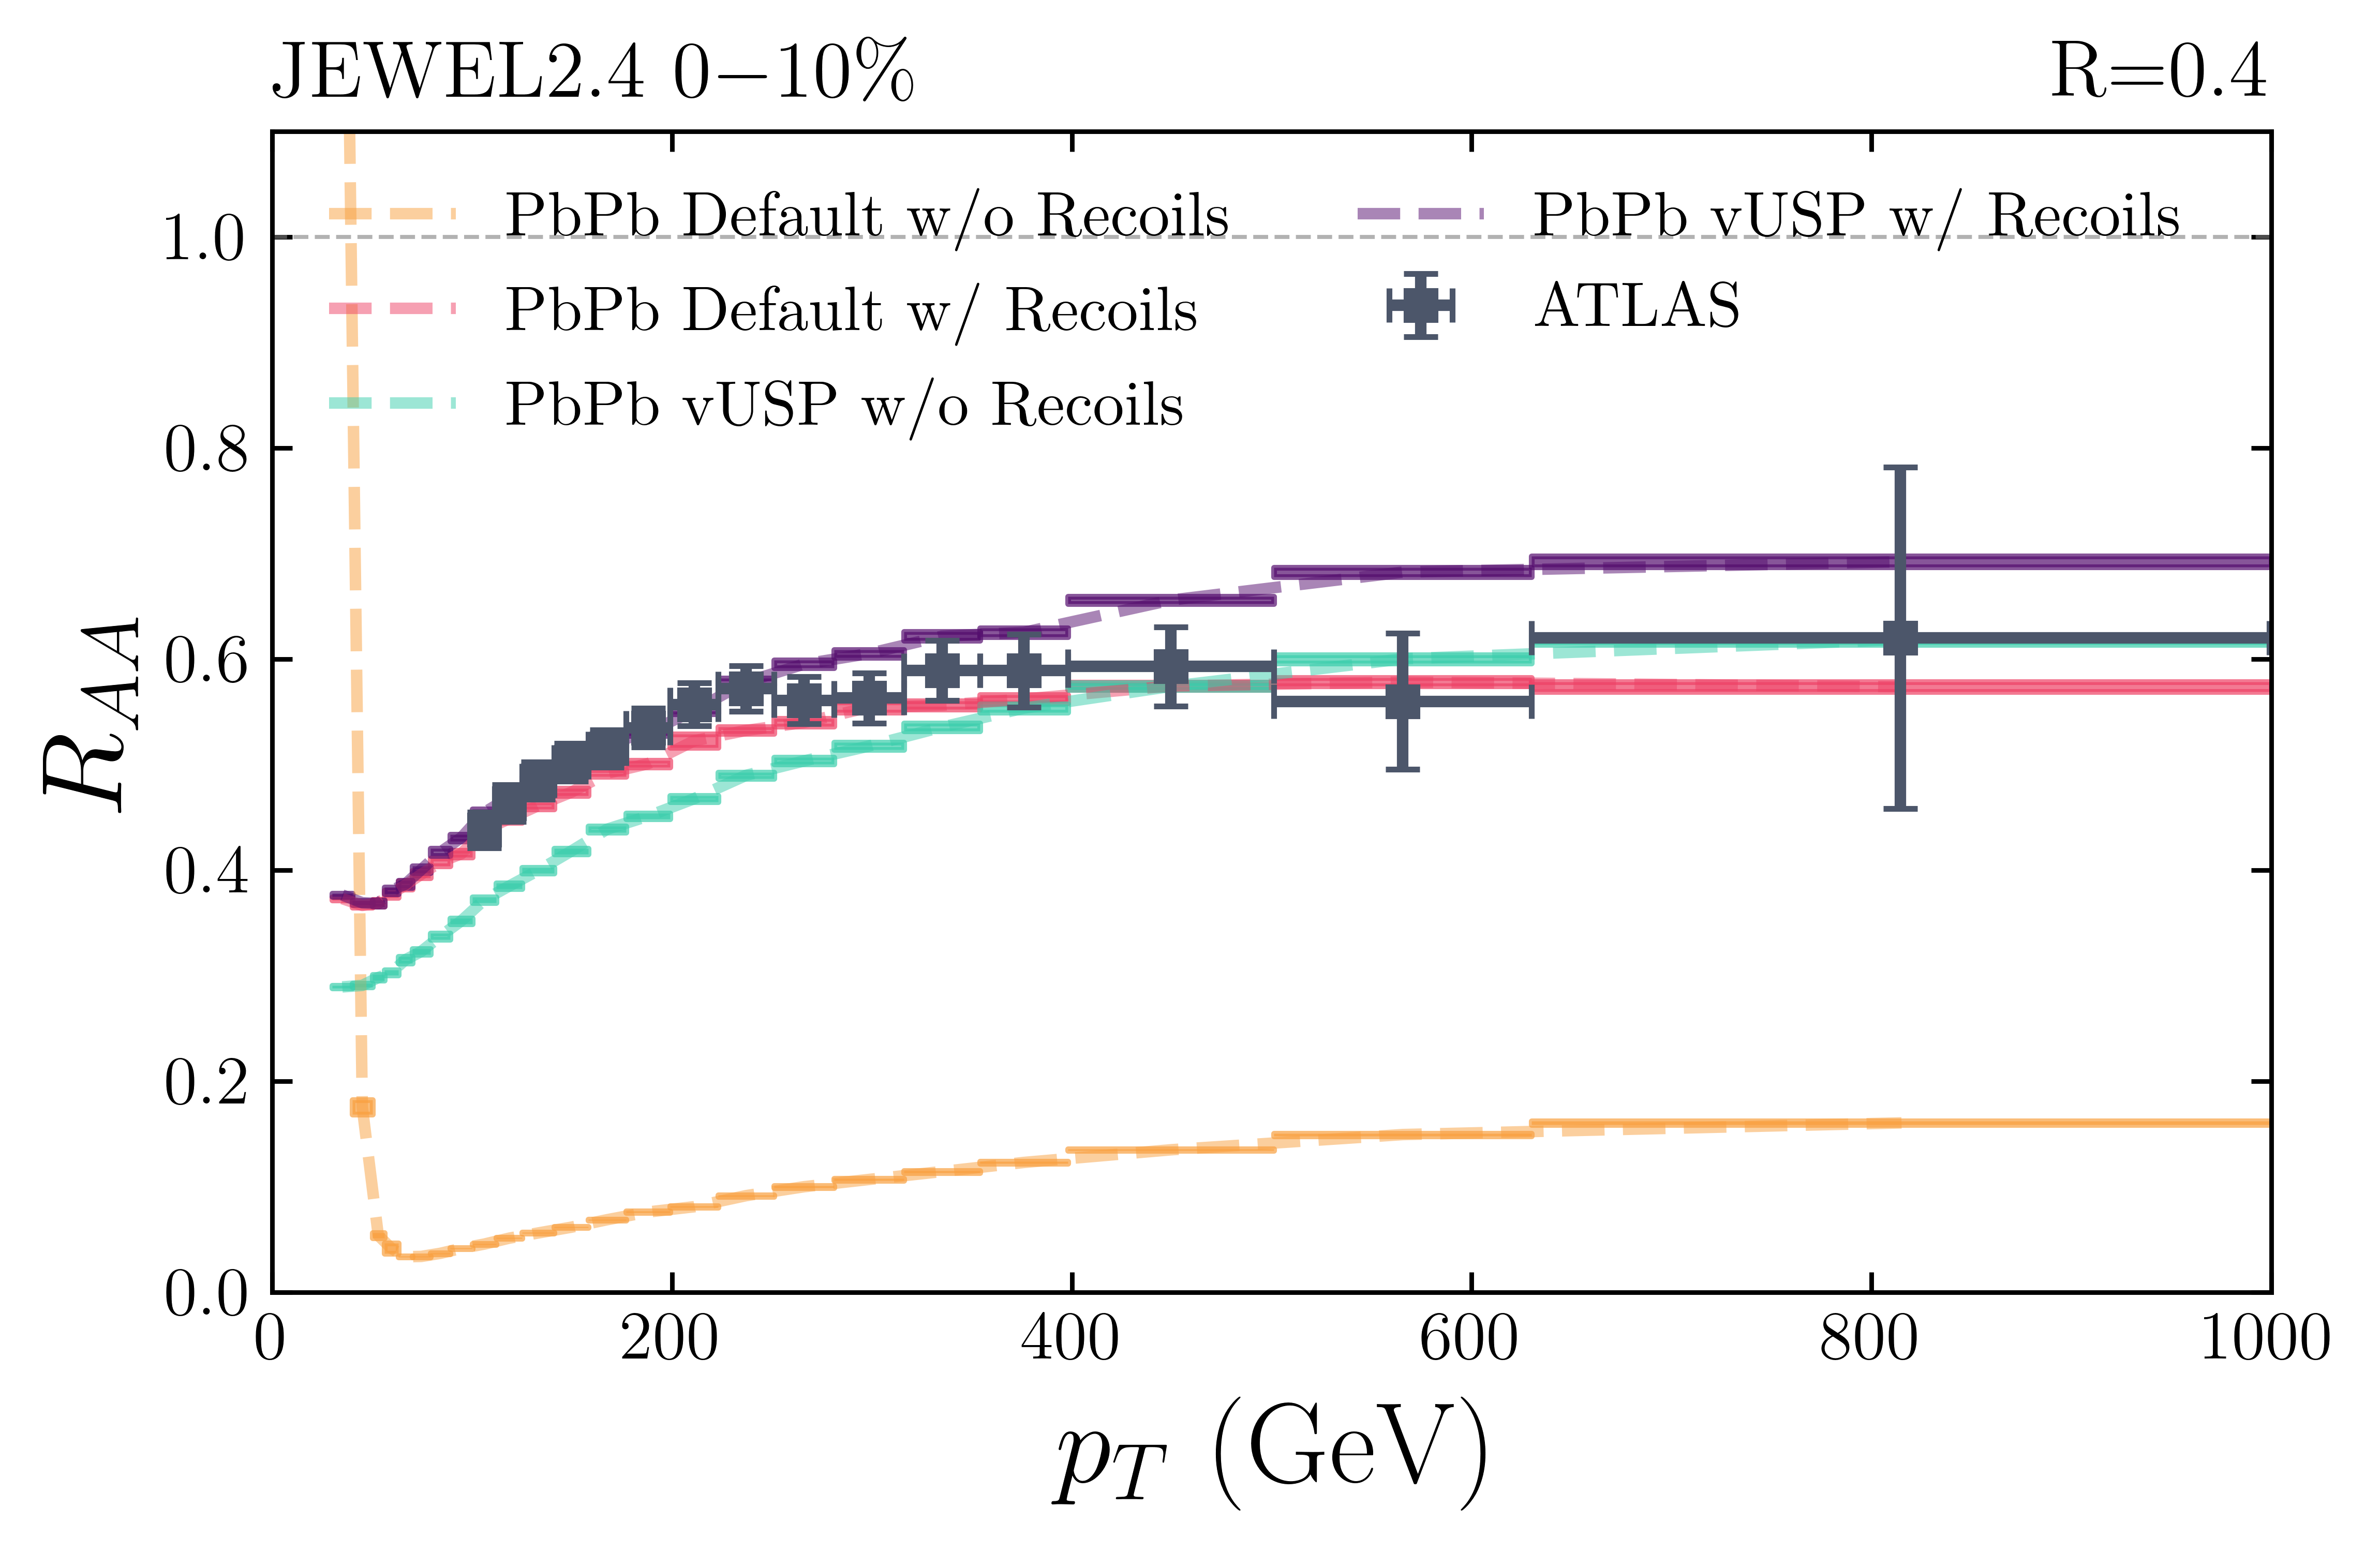

In [59]:
import yoda
import matplotlib.pyplot as plt
import numpy as np

# Função para obter dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min=0, max=0):
    data = yoda.read(file)[scatter]
    if max == 0:
        if scatter == '/REF/ATLAS_2018_I1673184/d19-x01-y01':
            max = len(data.xVals())
        else:
            max = len(data.xVals())
    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]

plt.style.use('plotconfig.mplstyle')

# Definição de variáveis e arquivos YODA
R = 0.4
CENTS = ['0-10']

#yodapp = '/eos/user/m/mdemelop/Jewel_analysis/yoda_merge_files/pp_j245T_wrec_0410/pp_5020_raa_R' + str(R) + '.yoda'
yodapp = '/eos/user/m/mdemelop/Jewel_analysis/yoda_merge_files/pp_j245T_2510/pp_5020_raa_R' + str(R) + '.yoda'
yodaPbPb_def_wo = '/eos/user/m/mdemelop/Jewel_analysis/yoda_merge_files/simple_0410_j2.4_Pb_5T_worec/'+str(CENTS[0])+'_raa_R' + str(R) + '.yoda'
#yodaPbPb_def_w = '/eos/user/m/mdemelop/Jewel_analysis/yoda_merge_files/simple_0410_j2.4_Pb_5T_wrec/'+str(CENTS[0])+'_raa_R' + str(R) + '.yoda'
yodaPbPb_def_w = '/eos/user/m/mdemelop/Jewel_analysis/yoda_merge_files/simple_2510_j2.4_5T_wrec/'+str(CENTS[0])+'_raa_R' + str(R) + '.yoda'
yodaPbPb_vusp_wo = '/eos/user/m/mdemelop/Jewel_analysis/yoda_merge_files/flow_0410_j2.4_Pb_5T_worec/'+str(CENTS[0])+'_raa_R' + str(R) + '.yoda'
yodaPbPb_vusp_w = '/eos/user/m/mdemelop/Jewel_analysis/yoda_merge_files/flow_0410_j2.4_Pb_5T_wrec/'+str(CENTS[0])+'_raa_R' + str(R) + '.yoda'



obs = '/USPJWL_JETSPEC/JetpT_R' + str(R)

# Leitura dos arquivos YODA
histos_pp = yoda.read(yodapp)
histos_PbPb_def_wo = yoda.read(yodaPbPb_def_wo)
histos_PbPb_def_w = yoda.read(yodaPbPb_def_w)
histos_PbPb_vusp_wo = yoda.read(yodaPbPb_vusp_wo)
histos_PbPb_vusp_w = yoda.read(yodaPbPb_vusp_w)


pp_jet = histos_pp[obs]
PbPb_jet_def_wo = histos_PbPb_def_wo[obs]
PbPb_jet_def_w = histos_PbPb_def_w[obs]
PbPb_jet_vusp_wo = histos_PbPb_vusp_wo[obs]
PbPb_jet_vusp_w = histos_PbPb_vusp_w[obs]


# Normalização dos eventos
pp_evtc = histos_pp['/_EVTCOUNT'].sumW()
pp_xsec = histos_pp['/_XSEC'].point(0).x()
pp_jet.scaleW(pp_xsec / pp_evtc)

PbPb_evtc_def_wo = histos_PbPb_def_wo['/_EVTCOUNT'].sumW()
PbPb_xsec_def_wo = histos_PbPb_def_wo['/_XSEC'].point(0).x()
PbPb_jet_def_wo.scaleW(PbPb_xsec_def_wo / PbPb_evtc_def_wo)

PbPb_evtc_def_w = histos_PbPb_def_w['/_EVTCOUNT'].sumW()
PbPb_xsec_def_w = histos_PbPb_def_w['/_XSEC'].point(0).x()
PbPb_jet_def_w.scaleW(PbPb_xsec_def_w / PbPb_evtc_def_w)

PbPb_evtc_vusp_wo = histos_PbPb_vusp_wo['/_EVTCOUNT'].sumW()
PbPb_xsec_vusp_wo = histos_PbPb_vusp_wo['/_XSEC'].point(0).x()
PbPb_jet_vusp_wo.scaleW(PbPb_xsec_vusp_wo / PbPb_evtc_vusp_wo)

PbPb_evtc_vusp_w = histos_PbPb_vusp_w['/_EVTCOUNT'].sumW()
PbPb_xsec_vusp_w = histos_PbPb_vusp_w['/_XSEC'].point(0).x()
PbPb_jet_vusp_w.scaleW(PbPb_xsec_vusp_w / PbPb_evtc_vusp_w)

# # Rebin dos dados
# pp_jet.rebin(2)
# PbPb_jet_vusp_wo.rebin(2)
# PbPb_jet_vusp_w.rebin(2)
# PbPb_jet_vusp_wo.rebin(2)
# PbPb_jet_vusp_w.rebin(2)


# Cálculo do RAA para cada configuração
raa_def_wo = PbPb_jet_def_wo / pp_jet
raa_def_w = PbPb_jet_def_w / pp_jet
raa_vusp_wo = PbPb_jet_vusp_wo / pp_jet
raa_vusp_w = PbPb_jet_vusp_w / pp_jet

# Preparação para o plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=800)

# Função para plotar uma curva
# def plot_raa(ax, raa, color, label, linestyle='--'):
#     x = np.asarray(raa.xVals())
#     y = np.asarray(raa.yVals())
#     yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
#     xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)
#     ax.fill_between(x, y - yerr, y + yerr, alpha=0.4, color=color)
#     ax.plot(x, y, linestyle=linestyle, color=color, label=label)



# Função para plotar uma curva com preenchimento
def plot_raa(ax, raa, color, label, linestyle='--', alpha_fill=0.7, alpha_line=0.5):
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)
    
    # Preenchendo erro em cada ponto individualmente
    for k in range(len(x)):
        xlow, xhigh = x[k] - xerr[k], x[k] + xerr[k]
        ylow, yhigh = y[k] - yerr[k], y[k] + yerr[k]
        ax.fill_between([xlow, xhigh], ylow, yhigh, color=color, alpha=alpha_fill)
    
    # Plotando a linha central
    ax.plot(x, y, linestyle=linestyle, color=color, label=label, alpha=alpha_line)



# Plotando as curvas
plot_raa(ax, raa_def_wo, '#f9a03f', 'PbPb Default w/o Recoils')
plot_raa(ax, raa_def_w, '#ee4266', 'PbPb Default w/ Recoils')
plot_raa(ax, raa_vusp_wo, '#3bceac', 'PbPb vUSP w/o Recoils')
plot_raa(ax, raa_vusp_w, '#540d6e', 'PbPb vUSP w/ Recoils')

# Plot dos dados experimentais ATLAS
ATLAS1 = DataFromExperiment('/eos/user/m/mdemelop/Jewel_analysis/yoda_merge_files/ATLAS/ATLAS_0-10_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')
ax.errorbar(*ATLAS1, color='#4c566a', fmt='s', label='ATLAS', capsize=3, markersize=5)

# Definições do gráfico
ax.set_xlabel('$p_{T}$ (GeV)')
ax.set_ylabel('$R_{AA}$')
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.6, linewidth=0.7)
ax.legend(ncol=2,loc=2)
ax.set_title(r'JEWEL2.4 $0{-}10\%$', loc='left', fontsize=14)
ax.set_title('R=0.4', loc='right', fontsize=14)

ax.set_xlim([0, 1000])
ax.set_ylim([0., 1.1])

plt.tight_layout()
plt.savefig('./Figures/RAA_j2.4_PbPb_0-10_R0.4.pdf')
plt.savefig('./Figures/RAA_j2.4_PbPb_0-10_R0.4.png')

plt.show()
